<a href="https://colab.research.google.com/github/notice4/google-colab-study/blob/main/mid_term_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Regression:
## 1 step: read the data, analyze and clean it (info, null values, duplicated values, map)
## 2 step: choose the target (y) and the features (X)
## 3 step: split the data on a test and train set
## 4 step: set a model
## 5 step: rate the quality and print coefs

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [118]:
data = pd.read_csv('https://raw.githubusercontent.com/notice4/google-colab-study/refs/heads/main/insurance.csv', encoding='latin-1')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [120]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [121]:
data.duplicated().sum()

np.int64(1)

In [122]:
print(data.shape)
data.drop_duplicates(inplace=True)
print(data.shape)

(1338, 7)
(1337, 7)


In [123]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [124]:
data['region'] = data['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,0,16884.92400
1,18,male,33.770,1,no,1,1725.55230
2,28,male,33.000,3,no,1,4449.46200
3,33,male,22.705,0,no,2,21984.47061
4,32,male,28.880,0,no,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,2,10600.54830
1334,18,female,31.920,0,no,3,2205.98080
1335,18,female,36.850,0,no,1,1629.83350
1336,21,female,25.800,0,no,0,2007.94500


In [125]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [126]:
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,0,16884.92400
1,18,male,33.770,1,0,1,1725.55230
2,28,male,33.000,3,0,1,4449.46200
3,33,male,22.705,0,0,2,21984.47061
4,32,male,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,2,10600.54830
1334,18,female,31.920,0,0,3,2205.98080
1335,18,female,36.850,0,0,1,1629.83350
1336,21,female,25.800,0,0,0,2007.94500


In [127]:
data.drop('sex', axis=1, inplace=True)
data

,age,bmi,children,smoker,region,charges
0,19,27.900,0,1,0,16884.92400
1,18,33.770,1,0,1,1725.55230
2,28,33.000,3,0,1,4449.46200
3,33,22.705,0,0,2,21984.47061
4,32,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...
1333,50,30.970,3,0,2,10600.54830
1334,18,31.920,0,0,3,2205.98080
1335,18,36.850,0,0,1,1629.83350
1336,21,25.800,0,0,0,2007.94500


In [128]:
y = data['charges']
X = data.drop('charges', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

R^2 score: 0.8067723185156506
Coefficients: [  248.87841745   312.18564663   534.15195504 23041.7672531
   236.34291238]
Intersept -11799.473334872313


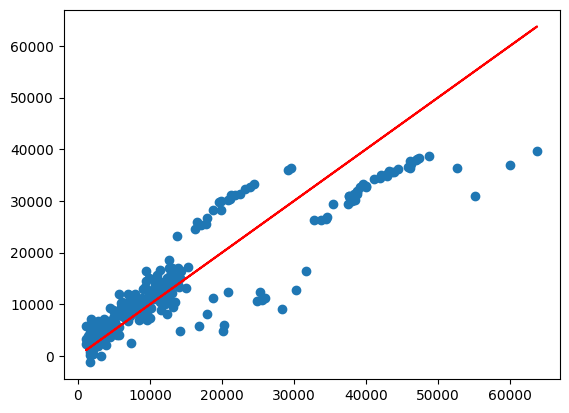

In [129]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')

print('R^2 score:', model.score(X_test, y_test))
print('Coefficients:', model.coef_)
print('Intersept', model.intercept_)

## 2) Classification:
